In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.oauth2 import service_account
from google.cloud import bigquery

Connect to BQ and Query BQ

In [3]:
credentials = service_account.Credentials.from_service_account_file(
'd:/Users/Ramona/Desktop/music-recommendation-system-24-3d0d21fb1f8b.json')
# music-recommendation-system-24-3d0d21fb1f8b.json is the service account JSON file. Save the file locally on your device and add the path here.
# make sure that the slashes in the path are '/' and not '\'

project_id = 'music-recommendation-system-24'
client = bigquery.Client(credentials= credentials,project=project_id)

In [4]:
query_job = client.query("""
   SELECT
      *
   FROM `music-recommendation-system-24.ml_tables_eu.spotify_songs_obama_concat_csv_V0`
   """)
#put the query in three quote marks

results = query_job.result() # Wait for the job to complete.

rows = [dict(row) for row in results]

# Convert the list of dictionaries to a DataFrame
df_bq = pd.DataFrame(rows)

In [5]:
df_bq.head()

,is_in_obama_playlist,track_id,track_name,track_album_name,track_artist,track_popularity,track_album_release_year,genre,duration_min,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1,0UZFhlhUMrYyzzyOHkylM3,Let's Get Lost,Chet Baker Sings And Plays (Remastered 2004),Chet Baker,52,1955,Jazz,3.73,52.0,37.00,C,-9.350,Major,3.00,84.0,0.0,11.00,55.0,78
1,1,3aEJMh1cXKEjgh52claxQp,I've Got You Under My Skin - Remastered 1998,Songs For Swingin' Lovers! (Remastered),Frank Sinatra,66,1956,Jazz,3.73,58.0,25.00,C#,-12.610,Major,4.00,45.0,0.0,11.00,59.0,127
2,0,6qb0O5HW7H4q6R0AbP38Ko,Long Tall Sally (The Thing),Here's Little Richard [Remastered & Expanded],Little Richard,1,1957,rock,2.20,47.4,59.80,F,-5.023,Major,9.73,76.8,0.0,8.41,91.7,184
3,1,6nKeLkmlyK3ooDoDUxZVgP,Lush Life,Ella Fitzgerald Sings The Duke Ellington Song ...,"Ella Fitzgerald,Oscar Peterson",18,1957,Jazz,3.67,40.0,4.38,A#,-19.260,Major,3.91,97.4,0.0,8.95,17.6,91
4,1,4smkJW6uzoHxGReZqqwHS5,I'll Be Seeing You,Billie Holiday,Billie Holiday,67,1957,Jazz,3.53,36.0,3.00,C#,-20.480,Major,4.00,99.0,6.0,12.00,19.0,90


In [13]:
# Create the contingency table with cumulative values
df_columns_to_keep = df_bq[['key', 'genre', 'mode', 'is_in_obama_playlist']]
df_columns_to_keep.head()

,key,genre,mode,is_in_obama_playlist
0,C,Jazz,Major,1
1,C#,Jazz,Major,1
2,F,rock,Major,0
3,A#,Jazz,Major,1
4,C#,Jazz,Major,1


In [14]:
df_columns_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33004 entries, 0 to 33003
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   key                   33004 non-null  object
 1   genre                 33004 non-null  object
 2   mode                  33004 non-null  object
 3   is_in_obama_playlist  33004 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


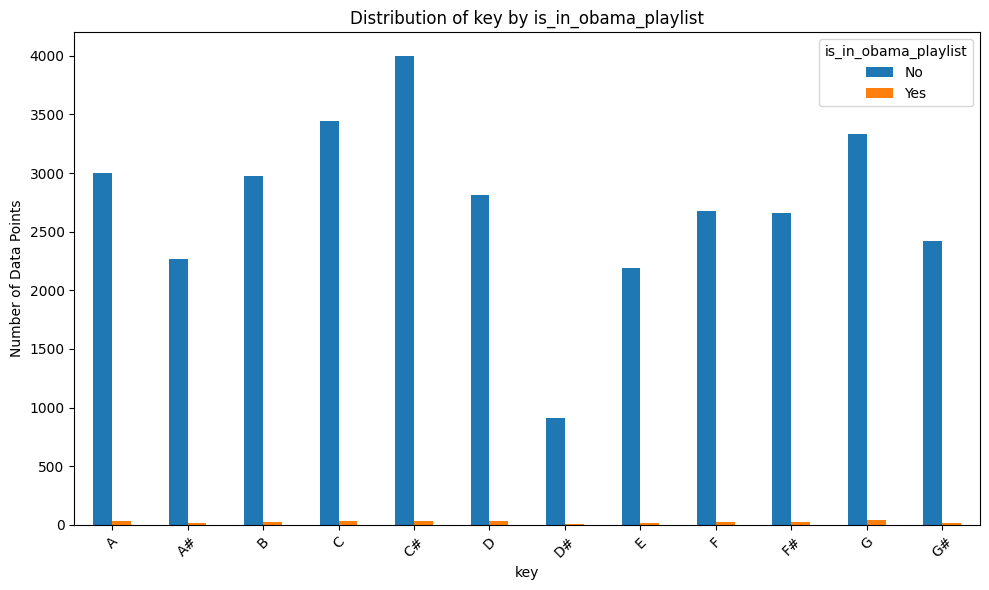

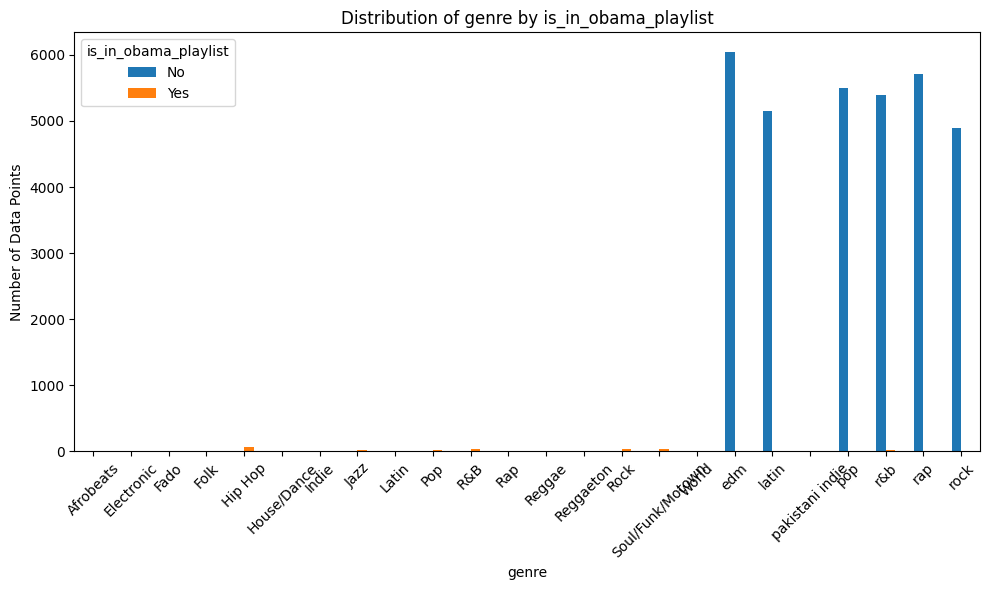

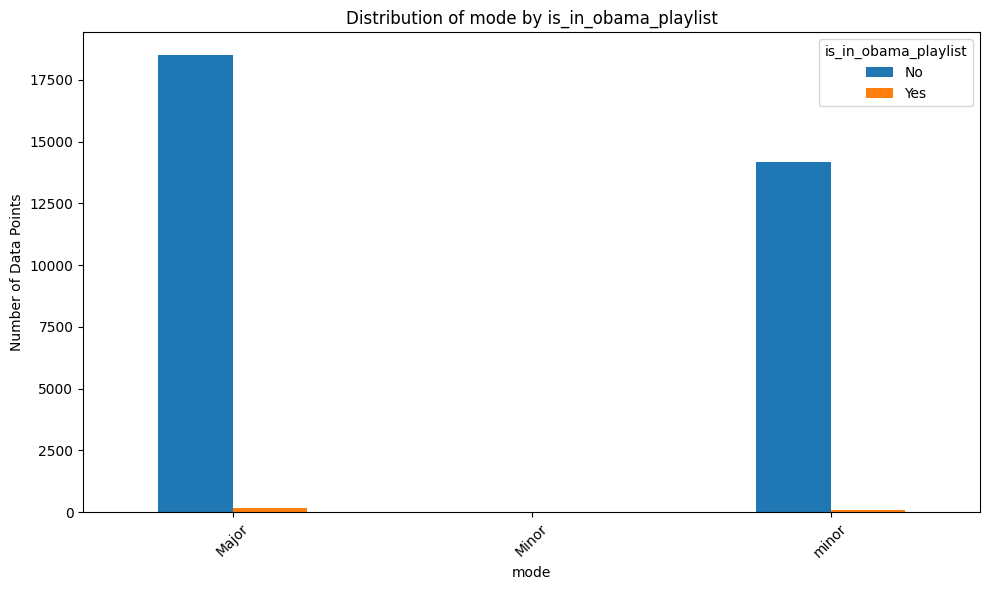

In [17]:
# List of categorical variables
categorical_vars = ['key', 'genre', 'mode']

# Create bar plots for each categorical variable
for var in categorical_vars:
    # Group by the categorical variable and 'is_in_obama_playlist'
    grouped_data = df_columns_to_keep.groupby([var, 'is_in_obama_playlist']).size().unstack(fill_value=0)
    
    # Plot the data
    grouped_data.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Distribution of {var} by is_in_obama_playlist')
    plt.xlabel(var)
    plt.xticks(rotation=45)
    plt.ylabel('Number of Data Points')
    plt.legend(title='is_in_obama_playlist', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

In [18]:
# Create an empty dictionary to store contingency tables
contingency_tables = {}

# List of categorical variables
categorical_vars = ['key', 'genre', 'mode']

# Generate contingency tables for each categorical variable
for var in categorical_vars:
    # Group by the categorical variable and 'is_in_obama_playlist'
    contingency_table = df_columns_to_keep.groupby([var, 'is_in_obama_playlist']).size().unstack(fill_value=0)
    
    # Store the contingency table
    contingency_tables[var] = contingency_table
    
    # Display the table
    print(f"Contingency Table for '{var}' grouped by 'is_in_obama_playlist':")
    print(contingency_table)
    print("\n")


Contingency Table for 'key' grouped by 'is_in_obama_playlist':
is_in_obama_playlist     0   1
key                           
A                     3001  37
A#                    2267  17
B                     2978  28
C                     3444  33
C#                    4000  37
D                     2817  30
D#                     910   7
E                     2190  17
F                     2673  28
F#                    2659  21
G                     3330  42
G#                    2421  17


Contingency Table for 'genre' grouped by 'is_in_obama_playlist':
is_in_obama_playlist     0   1
genre                         
Afrobeats                0   9
Electronic               0   6
Fado                     0   1
Folk                     0   9
Hip Hop                  0  58
House/Dance              0   3
Indie                    0   2
Jazz                     0  26
Latin                    0   2
Pop                      0  15
R&B                      0  40
Rap                      0   3
Re